In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company = pd.read_csv('E:/DataScience/Assignments/Decision Tree/Company_Data.csv')

In [3]:
company

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [4]:
company['Urban'] = company['Urban'].replace(['Yes'], '1')

In [5]:
company['Urban'] = company['Urban'].replace(['No'], '0')

In [6]:
company['US'] = company['US'].replace(['Yes'], '1')

In [7]:
company['US'] = company['US'].replace(['No'], '0')

In [8]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban US  
0         17     1  1  
1         10     1  1  
2         12     1  1  
3         14     1  1  
4         13     1  0

In [74]:
 dummies = pd.get_dummies(company['ShelveLoc'])

In [75]:
dummies.head()

Bad  Good  Medium
0    1     0       0
1    0     1       0
2    0     0       1
3    0     0       1
4    1     0       0

In [76]:
company = pd.concat([company,dummies], axis=1)

In [77]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban US  Bad  Good  Medium  
0         17     1  1    1     0       0  
1         10     1  1    0     1       0  
2         12     1  1    0     0       1  
3         14     1  1    0     0       1  
4         13     1  0    1     0       0

In [78]:
company = company.rename(columns={"Bad": "ShelveLoc_Bad", "Good": "ShelveLoc_Good", "Medium": "ShelveLoc_Medium"})

In [79]:
company = company.drop(columns=['ShelveLoc'])

In [80]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0   9.50        138      73           11         276    120   42         17   
1  11.22        111      48           16         260     83   65         10   
2  10.06        113      35           10         269     80   59         12   
3   7.40        117     100            4         466     97   55         14   
4   4.15        141      64            3         340    128   38         13   

  Urban US  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  
0     1  1              1               0                 0  
1     1  1              0               1                 0  
2     1  1              0               0                 1  
3     1  1              0               0                 1  
4     1  0              1               0                 0

In [81]:
company['Sales'] = pd.cut(company['Sales'],bins=[0,3,7,10,13],labels=['Lowest','Low','Medium','High'])

In [82]:
company

Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0    Medium        138      73           11         276    120   42   
1      High        111      48           16         260     83   65   
2      High        113      35           10         269     80   59   
3    Medium        117     100            4         466     97   55   
4       Low        141      64            3         340    128   38   
..      ...        ...     ...          ...         ...    ...  ...   
395    High        138     108           17         203    128   33   
396     Low        139      23            3          37    120   55   
397  Medium        162      26           12         368    159   40   
398     Low        100      79            7         284     95   50   
399  Medium        134      37            0          27    120   49   

     Education Urban US  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  
0           17     1  1              1               0                 0  
1           10     1  1              0               1                 0  
2           12     1  1              0               0                 1  
3           14     1  1              0               0                 1  
4           13     1  0              1               0                 0  
..         ...   ... ..            ...             ...               ...  
395         14     1  1              0               1                 0  
396         11     0  1              0               0                 1  
397         18     1  1              0               0                 1  
398         12     1  1              1               0                 0  
399         16     1  1              0               1                 0  

[400 rows x 13 columns]

In [83]:
company.isna().sum()

Sales               12
CompPrice            0
Income               0
Advertising          0
Population           0
Price                0
Age                  0
Education            0
Urban                0
US                   0
ShelveLoc_Bad        0
ShelveLoc_Good       0
ShelveLoc_Medium     0
dtype: int64

In [84]:
company = company.dropna()

In [85]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0  Medium        138      73           11         276    120   42         17   
1    High        111      48           16         260     83   65         10   
2    High        113      35           10         269     80   59         12   
3  Medium        117     100            4         466     97   55         14   
4     Low        141      64            3         340    128   38         13   

  Urban US  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  
0     1  1              1               0                 0  
1     1  1              0               1                 0  
2     1  1              0               0                 1  
3     1  1              0               0                 1  
4     1  0              1               0                 0

In [86]:
label_encoder = preprocessing.LabelEncoder()
company['Sales']= label_encoder.fit_transform(company['Sales']) 

<ipython-input-86-78cdb531ca5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Sales']= label_encoder.fit_transform(company['Sales'])


In [87]:
x=company.iloc[:,1:11]
y=company['Sales']

In [88]:
x

CompPrice  Income  Advertising  Population  Price  Age  Education Urban  \
0          138      73           11         276    120   42         17     1   
1          111      48           16         260     83   65         10     1   
2          113      35           10         269     80   59         12     1   
3          117     100            4         466     97   55         14     1   
4          141      64            3         340    128   38         13     1   
..         ...     ...          ...         ...    ...  ...        ...   ...   
395        138     108           17         203    128   33         14     1   
396        139      23            3          37    120   55         11     0   
397        162      26           12         368    159   40         18     1   
398        100      79            7         284     95   50         12     1   
399        134      37            0          27    120   49         16     1   

    US  ShelveLoc_Bad  
0    1              1  
1    1              0  
2    1              0  
3    1              0  
4    0              1  
..  ..            ...  
395  1              0  
396  1              0  
397  1              0  
398  1              1  
399  1              0  

[388 rows x 10 columns]

In [89]:
y

0      3
1      0
2      0
3      3
4      1
      ..
395    0
396    1
397    3
398    1
399    3
Name: Sales, Length: 388, dtype: int32

In [90]:
company['Sales'].unique

<bound method Series.unique of 0      3
1      0
2      0
3      3
4      1
      ..
395    0
396    1
397    3
398    1
399    3
Name: Sales, Length: 388, dtype: int32>

In [91]:
company.Sales.value_counts()

1    167
3    138
0     67
2     16
Name: Sales, dtype: int64

In [92]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'Urban',
 'US',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium']

In [93]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [94]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

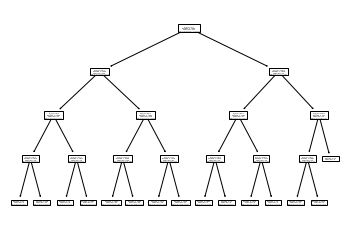

In [95]:
tree.plot_tree(model);

In [96]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc_Bad','ShelveLoc_Medium','ShelveLoc_Good','Age','Education','Urban','US']
cn=['Lowest','Low','Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,40), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [97]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    46
3    21
0    11
dtype: int64

In [98]:
preds

array([3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 0, 1,
       3, 1, 1, 3, 1, 3, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3,
       3, 1, 3, 0, 1, 3, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       3, 1, 1, 3, 1, 3, 3, 0, 1, 1, 3, 3])

In [99]:
pd.crosstab(y_test,preds)

col_0  0   1  3
Sales          
0      7   4  6
1      0  24  6
2      0   6  0
3      4  12  9

In [100]:
np.mean(preds==y_test)

0.5128205128205128

In [101]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [102]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [103]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5128205128205128

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
array = company.values
X = array[:,1:11]
y = array[:,0]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [107]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [108]:
model.score(X_test,y_test)

-1.1559267241379305